In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [103]:
features = df[['TV', 'Radio', 'Newspaper']]
response = df['Sales']
total_ads = pd.DataFrame(features.sum(axis=1), columns=['Total Ads'])
total_ads.head()

,Total Ads
0,337.1
1,128.9
2,132.4
3,251.3
4,250.0


In order to determine the relationship between total ads and sales, I calculate the pearson correlation coefficient.

In [104]:
def pearson_correlation(x, y):
    # Calculate the means
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate the differences from the means
    diff_x = x - mean_x
    diff_y = y - mean_y
    
    # Calculate the covariance and standard deviations
    covariance = np.sum(diff_x * diff_y)
    std_x = np.sqrt(np.sum(diff_x**2))
    std_y = np.sqrt(np.sum(diff_y**2))
    
    # Calculate the correlation coefficient
    correlation = covariance / (std_x * std_y)
    
    return correlation

In [105]:
pearson_correlation(total_ads["Total Ads"], response)

0.867712302701742

Ex 4 b)

The correlation coefficient r = 0.87 is positive and greater than 0.7. Therefore we can assume a strong positive relationship between total ads and sales. So: As the total ad expenses increase, the sales also tend to increase.

Furthermore I will perform a linear regression analysis and estimate the parameter coefficients.

In [106]:
def fit_model(X, Y):
    XTX = np.dot(X.T, X)
    XTY = np.dot(X.T, Y)
    beta = np.dot(np.linalg.inv(XTX), XTY)

    return beta

In [107]:
X = total_ads[['Total Ads']]
Y = df['Sales']
X.insert(0, 'Intercept', 1)

In [108]:
fit_model(X,Y)

array([4.24302822, 0.04868788])

Also the estimate coefficient for TV ad expense is positive. 

Interpretation: 
If we would not spent any money on ads, we would sell around 4.243028 units (Intercept)

If we increase our ad expenses by 1 dollar (unit), our sales would increase by 0.048688.

Or state it like that: An additional $1,000 spent ads is associated with an increase in sales of 48,688 sales.

So we find a postive relationship between ad expenses and sales.

Ex. 4 c)

In order to find the strongest and weakest relationship between the different types of ads and sales. We calculate the correlation between each of them

In [109]:
for ad in features.columns.tolist():
    print(ad + ": r = " + str(pearson_correlation(features[ad], response)))

TV: r = 0.7822244248616063
Radio: r = 0.5762225745710553
Newspaper: r = 0.22829902637616534


All kind of ads are positively correlated with sales, so we can assume that higher ad expenses will lead to more sales. 
The TV ads have the strongest relationship with sales, while Newspaper ads have the weakest relationship with sales.

Ex 4 d)

I will predict the sales for the upcoming years, if the company will spend 50.000$ in TV ads.
First I will estimate the coefficients and based on these make a prediction.
Afterwards I will evaluate the model. 

In [110]:
X = df[['TV']]
Y = df['Sales']
X.insert(0, 'Intercept', 1)

In [111]:
# Estimate the coefficients
beta = fit_model(X, Y)

# Print the regression coefficients and log-likelihood
print("Regression Coefficients:")
print(f"Intercept: {beta[0]}")
print(f"TV: {beta[1]}")

Regression Coefficients:
Intercept: 7.032593549127707
TV: 0.04753664043301971


In [112]:
def predict(X, coefficients):
        return coefficients[0] + np.dot(X, coefficients[1:])

In [113]:
X_star = 50
pred_50 = predict(X_star, beta)
print(pred_50[0])

9.409425570778692


Based on the estimated coefficient we would expect 9,409 widgets to sell next year, if the company decides to spent 50.000$ on TV ads.

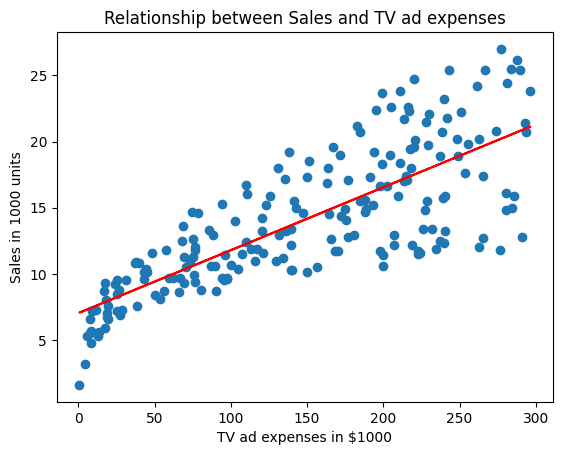

In [114]:
X=np.array(df[['TV']])
Y=np.array(df[['Sales']])
Y_pred=beta[0] + beta[1]*X 
plt.scatter(X, Y)
plt.xlabel("TV ad expenses in $1000")
plt.ylabel("Sales in 1000 units")
plt.title("Relationship between Sales and TV ad expenses")
plt.plot(X, Y_pred, color='red')

To evaluate the model, we first calculate the root mean squared error and the R^2

In [115]:
y_predicted = pd.DataFrame({"y_pred":predict(X, beta)})
y_predicted.head()

,y_pred
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218


In [116]:
def root_mean_squared_error(y_true, y_pred):

    # Convert inputs to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate squared errors
    squared_errors = (y_true - y_pred) ** 2

    # Calculate mean squared error
    mean_squared_error = np.mean(squared_errors)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [117]:
print("Range of response variable: From " + str(df["Sales"].min()) + " to " + str(df["Sales"].max()))

Range of response variable: From 1.6 to 27.0


In [118]:
root_mean_squared_error(response, y_predicted["y_pred"])

3.2423221486546887

It appears that the RMSE is relatively small compared to the range of the response variable. This suggests that my predictions have a relatively low average, but still considerable difference from the actual sales values.

In [119]:
def r_squared(y_true, y_pred):
    # Convert inputs to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the sum of squared residuals
    ss_residuals = np.sum((y_true - y_pred) ** 2)

    # Calculate the total sum of squares
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)

    # Calculate R-squared
    r2 = 1 - (ss_residuals / ss_total)

    return r2

In [120]:
r_squared(response, y_predicted["y_pred"])

0.611875050850071

The R-Squared shows that approximately 61.18% of the variance in the response variable (Sales) can be explained by my model. This is relatively low. This is due to 2 factors: 
Firstly, as you can see in the plot above, there is an increasingly higher variance in the data as TV ad spending increases. Secondly, the model choice is quite simple.

In [121]:
alpha = 0.95
residuals = Y - Y_pred
ci = np.quantile(residuals, 1 - alpha)
print(f"Confidence Interval: [{round((pred_50[0] + ci) * 1000, 0)}, {round((pred_50[0] - ci) * 1000, 0)}]")

Confidence Interval: [3587.0, 15232.0]


Given a TV advertisement budget of 50,000 dollar, there is a 95 percent probability that the number of items sold will fall within the range of 3,587 to 15,232. This wide range undermines the persuasiveness of the estimate. However, based on the scatter plot provided, our model performs well for budgets below 100,000 dollar. Beyond that threshold, the standard deviation increases, indicating greater uncertainty in the predictions. Therefore, it would be prudent to examine a narrower confidence interval for more precise estimation.

In [122]:
idx = [i for i in range(0, len(X)) if X[i] <= 100]
ci = np.quantile(residuals[idx], 1 - alpha)
print(f"Interval: [{round((pred_50[0] + ci) * 1000, 0)}, {round((pred_50[0] - ci) * 1000, 0)}]")

Interval: [6903.0, 11916.0]


By restricting our focus to expenditures equal to or below $100,000, we can anticipate that sales will fall within the range of 6,903 to 11,916. This narrower interval provides a more dependable prediction that the company can confidently rely on.